<div class="alert alert-block alert-success">
    <b><center>SOFTMAX CLASSIFICATION</center></b>
    <b><center>Multiclass Classification에 댸한 기본을 이해하기 위한 코드</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [3]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'1.15.0'

# Understanding The Concept

In [4]:
eduConf = rsp.EduPlotConf(font="NanumGothicCoding", figScale=1)
plotExp = rsp.EduPlot2D(eduConf)

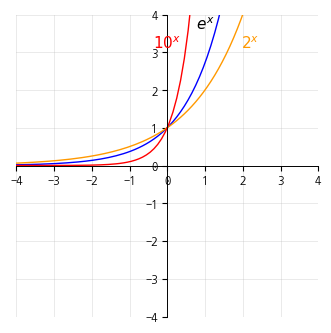

In [5]:
x = np.linspace(-10, 10, 200)
plotExp.addXYData(x, np.exp(x), name="exponential")
plotExp.addText([[1, 3.5]], ["${e}^{x}$"], name="exponential")

plotExp.addXYData(x, 2**x, color="#FF9900", name="exponential2")
plotExp.addText([[2.2, 3]], ["${2}^{x}$"], color="#FF9900", name="exponential2")

plotExp.addXYData(x, 10**x, color="#FF0000", name="exponential10")
plotExp.addText([[0, 3]], ["${10}^{x}$"], color="#FF0000", name="exponential10")
plotExp.genSpace(4)
plt.show()
plt.close()

## Optimize
$$ \underset { W }{ minimize } \quad cost(W,b) = W -\alpha \frac { \partial  }{ \partial W } cost(W) $$

# Logistic Classification

## Prepare Datas

In [6]:
data = [
    [1, 9, 8],
    [2, 1, 9],
    [3, 2, 1],
    [4, 3, 2],
    [5, 4, 3],
    [6, 5, 4],
    [7, 6, 5],
    [8, 7, 6]
]
label = [
    [0, 0, 1],
    [0, 0, 1],
    [0, 0, 1],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 0, 0]
]

In [7]:
data = np.array(data, dtype=float)
label = np.array(label, dtype=float)
data.shape, label.shape

((8, 3), (8, 3))

## Generate Model

In [8]:
X = tf.placeholder(tf.float32, shape=[None,3], name="data")
Y = tf.placeholder(tf.float32, shape=[None,3], name="label")
W = tf.Variable(tf.random_normal([3, 3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

In [9]:
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
loss = - tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

## Training

In [10]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [11]:
for step in range(20001):
    loss_val, hy_val, _ = sess.run([loss, hypothesis, optimizer], feed_dict= {X:data, Y:label})
    if step % 10000 == 0:
        print (loss_val, hy_val)

2.6955602 [[2.31e-07 1.00e+00 2.38e-04]
 [9.50e-01 4.88e-02 1.05e-03]
 [5.76e-02 9.39e-01 3.36e-03]
 [2.17e-02 9.78e-01 3.15e-04]
 [7.96e-03 9.92e-01 2.87e-05]
 [2.89e-03 9.97e-01 2.60e-06]
 [1.05e-03 9.99e-01 2.34e-07]
 [3.79e-04 1.00e+00 2.11e-08]]
0.25516108 [[2.57e-02 4.46e-03 9.70e-01]
 [2.42e-02 2.16e-05 9.76e-01]
 [3.54e-02 5.79e-01 3.86e-01]
 [9.57e-02 6.62e-01 2.43e-01]
 [2.21e-01 6.48e-01 1.31e-01]
 [4.21e-01 5.21e-01 5.81e-02]
 [6.43e-01 3.37e-01 2.07e-02]
 [8.14e-01 1.80e-01 6.10e-03]]
0.20070845 [[1.98e-02 2.30e-03 9.78e-01]
 [1.80e-02 2.52e-05 9.82e-01]
 [1.07e-02 4.78e-01 5.11e-01]
 [4.86e-02 6.98e-01 2.53e-01]
 [1.61e-01 7.47e-01 9.20e-02]
 [3.92e-01 5.83e-01 2.44e-02]
 [6.73e-01 3.22e-01 4.57e-03]
 [8.66e-01 1.33e-01 6.42e-04]]


## Predict

In [12]:
predicted = tf.cast(hypothesis>0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [13]:
sess.run([hypothesis, predicted, accuracy], feed_dict={X:data, Y:label})

[array([[2.10e-02, 1.24e-07, 9.79e-01],
        [1.78e-02, 3.82e-04, 9.82e-01],
        [1.13e-02, 4.71e-01, 5.17e-01],
        [5.08e-02, 6.96e-01, 2.53e-01],
        [1.66e-01, 7.45e-01, 8.96e-02],
        [3.95e-01, 5.82e-01, 2.32e-02],
        [6.71e-01, 3.25e-01, 4.28e-03],
        [8.62e-01, 1.37e-01, 5.97e-04]], dtype=float32), array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.]], dtype=float32), 1.0]

In [14]:
sess.close()